In [ ]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils




Two types of latent space traversals and their corresponding plots

1 - Linear Interpolation


### Linear Interpolation Equation

The linear interpolation between two random latent vectors \( z_1 \) and \( z_2 \) is given by:

$$
z_{\text{interpolated}} = (1 - \alpha) \cdot z_1 + \alpha \cdot z_2
$$
where α is interpolating parameter

In [ ]:
# Linear interpolation function
def linear_traversal(z1, z2, num_steps=100):
    alphas = np.linspace(0, 1, num_steps)
    for alpha in alphas:
      interpolation_function =(1 - alpha) * z1 + alpha * z2 #Linear Interpolation equation

    return interpolated_function

# Two random latent vectors
z1 = torch.randn(1, nz, 1, 1, device=device)
z2 = torch.randn(1, nz, 1, 1, device=device)

interpolated_z = linear_traversal(z1, z2, num_steps=100)

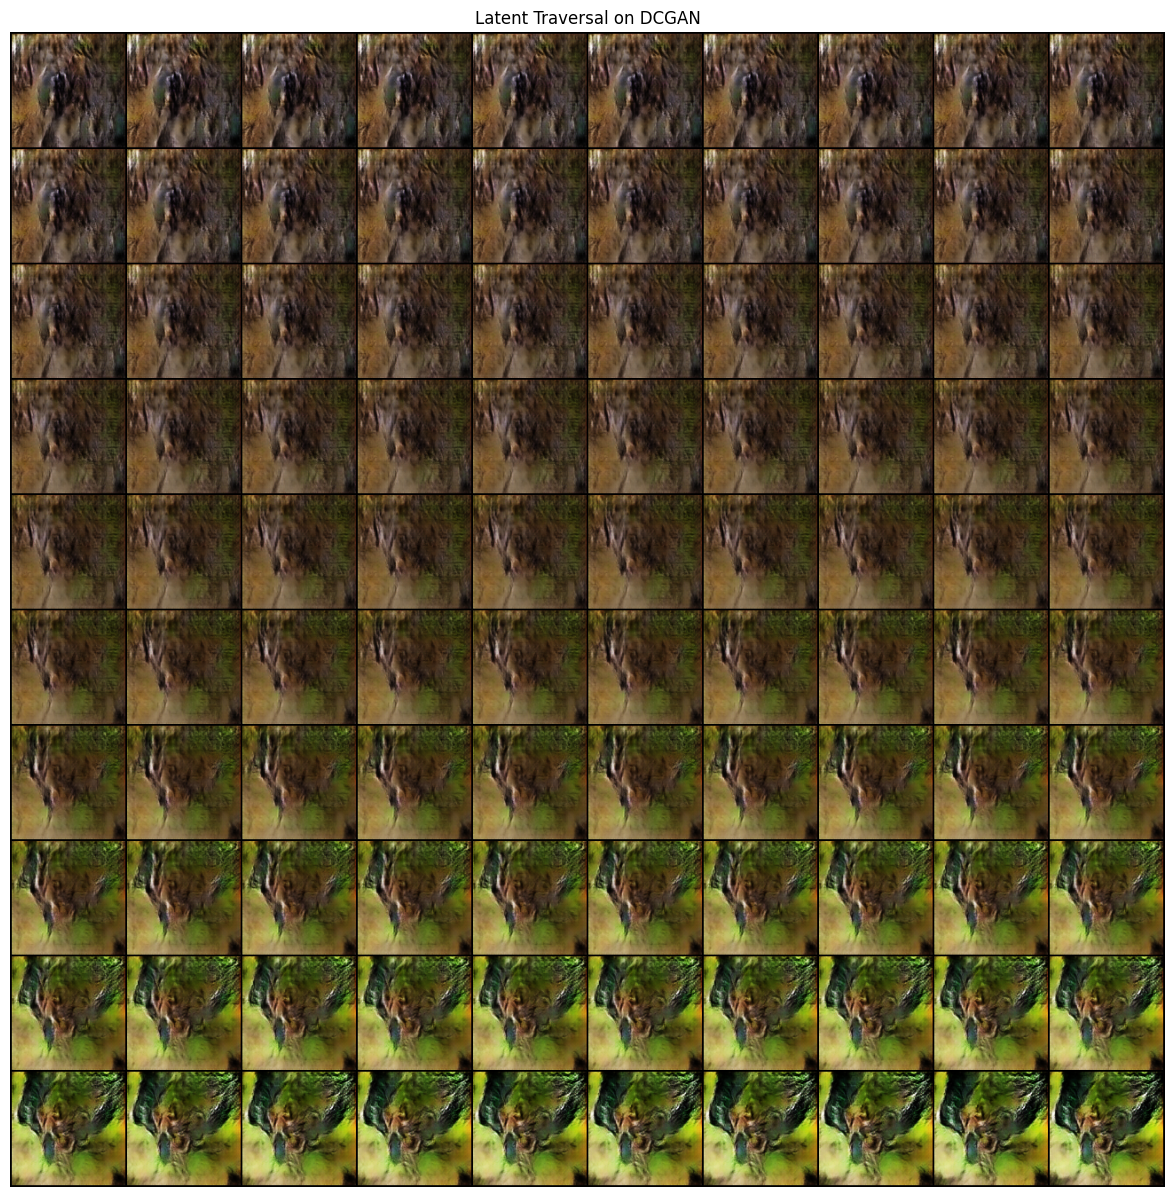

In [ ]:


# Generate images from the interpolated latent vectors
with torch.no_grad():
  for z in interpolated_z:
    linear_interpolated_images = torch.cat(Gen(z).detach().cpu(), dim=0)  # concatenating the tensors


plt.figure(figsize=(15, 15))
plt.axis("off")
plt.title("Latent Traversal on DCGAN")

plt.imshow(np.transpose(vutils.make_grid(linear_interpolated_images, padding=2, normalize=True, nrow=10), (1, 2, 0)))
plt.show()


On Butterfly dataset

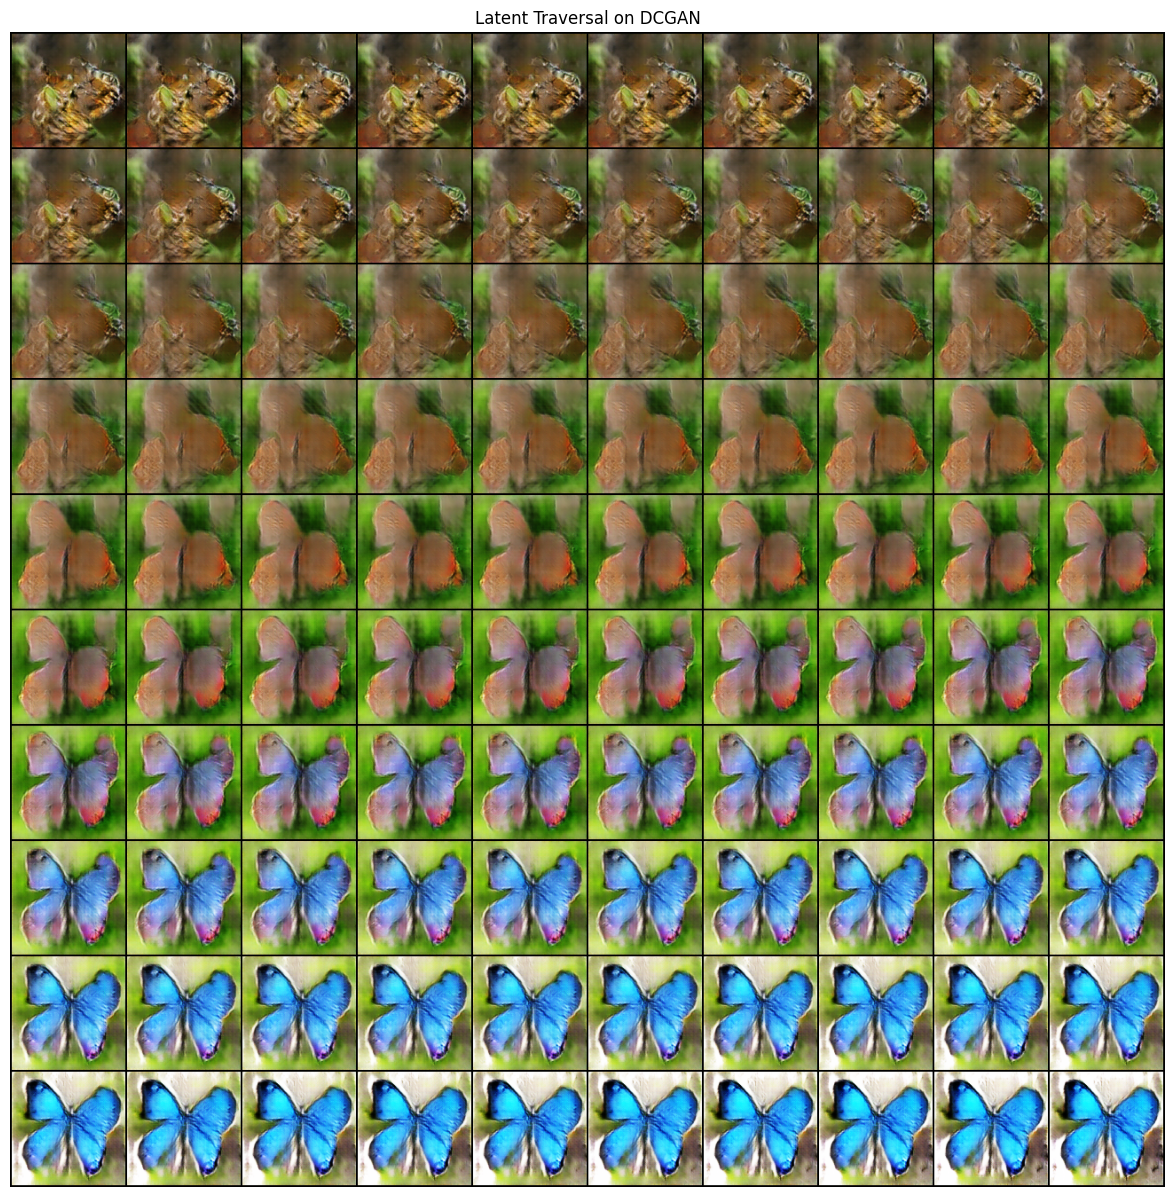

In [ ]:


# Generate images from the interpolated latent vectors
with torch.no_grad():
  for z in interpolated_z:
    linear_interpolated_images = torch.cat(Gen(z).detach().cpu(), dim=0)  # concatenating the tensors


plt.figure(figsize=(15, 15))
plt.axis("off")
plt.title("Latent Traversal on DCGAN")

plt.imshow(np.transpose(vutils.make_grid(linear_interpolated_images, padding=2, normalize=True, nrow=10), (1, 2, 0)))
plt.show()


In [ ]:
# device="cuda"
# cuda = True if torch.cuda.is_available() else False
# Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
# LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor

# z1 = torch.randn(1, nz, 1, 1, device=device)
# z2 = torch.randn(1, nz, 1, 1, device=device)

# inter = torch.stack([z1 + (z2 - z1)*t for t in np.linspace(0, 1, 10)])

# print(inter.shape)

torch.Size([10, 1, 256, 1, 1])


2-Spherical Interpolation(non-linear)


### Spherical Interpolation Formula

Two random latent vectors \( z_1 \) and \( z_2 \) and a parameter t:

$$
\text{Spherical Interpolation}(z_1, z_2, t) = \frac{\sin((1 - t) \theta)}{\sin(\theta)} z_1 + \frac{\sin(t \theta)}{\sin(\theta)} z_2
$$

where:
- θ is the angle between \( z_1 \) and \( z_2 \) in latent space, calculated as:

$$
\theta = \arccos\left(\frac{z_1 \cdot z_2}{\|z_1\| \|z_2\|}\right)
$$


Images for Spherical interpolation mentioned in report

In [ ]:
z1 = torch.randn((1, nz, 1, 1)).to(device)
z2 = torch.randn((1, nz, 1, 1)).to(device)

Z = torch.zeros((0, nz, 1, 1))
Z_img = torch.zeros((0, 3, 128, 128))



In [ ]:

def spherical_interpolation(z1, z2, t):
    z1_norm = z1 / torch.norm(z1)
    z2_norm = z2 / torch.norm(z2)
    theta = torch.acos(torch.sum(z1_norm * z2_norm))
    interpolation_equation = (torch.sin((1 - t) * theta) / torch.sin(theta)) * z1 + (torch.sin(t * theta) / torch.sin(theta)) * z2 #spherical(non-linear) interpolation equation

    if torch.sin(theta) == 0:
        return z1

    return interpolation_equation

for i in range(100):
    t = i / 99
    z_new = spherical_interpolation(z1, z2, t)
    z_new_img = Gen(z_new).cpu() # Generates the image from the interpolated latent vector


    Z = torch.cat((Z, z_new.cpu()))
    Z_img = torch.cat((Z_img, z_new_img))

print(Z_img.shape)
save_image(Z_img * 0.5 + 0.5, '/content/drive/MyDrive/chaitanya/Animal_spherical.png', nrow=10)


torch.Size([100, 3, 128, 128])
